# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [18]:
df = pd.read_csv("../data/states_edu.csv")
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [19]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [20]:
df["YEAR"].count()

602

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [21]:
MichiganAVG = df[df["STATE"] == "MICHIGAN"]["AVG_MATH_8_SCORE"].mean()
OhioAVG = df[df["STATE"] == "OHIO"]["AVG_MATH_8_SCORE"].mean()
print("Michigan's Average Grade 8 Math score:", MichiganAVG)
print("Ohio's Average Grade 8 Math score:", OhioAVG)
print("Ohio's average is higher")

Michigan's Average Grade 8 Math score: 276.1666666666667
Ohio's Average Grade 8 Math score: 282.25
Ohio's average is higher


Find the average for your chosen test across all states in 2019

In [22]:
USAVG = df[df["YEAR"] == 2019]["AVG_MATH_8_SCORE"].mean()
print(USAVG)

281.2641509433962


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [23]:
states = df.groupby("STATE")
states["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [24]:
df["ENROLL_ALL"].isna().sum()

74

In [25]:
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

In [26]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

Feature engineering justification: **I am creating a feature which looks at the amount of money spent on each student, since there is likely a relationship between the resources the students have access too, versus there performce on standardized exams.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

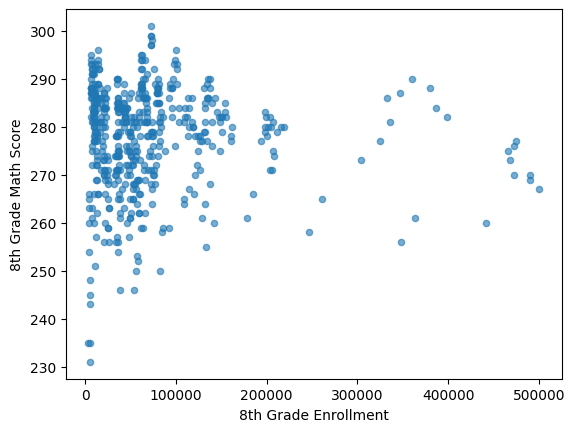

In [29]:
df.plot.scatter(x='ENROLL_8', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade Enrollment')
plt.ylabel('8th Grade Math Score')

**This scatter plot is comparing the enrollment quantaties, with the 8th grade math scores. This scatter plot is very vertical and seems disorderly. From first impressions, it seems there is not a significant correlation between enrollment numbers versus the 8th grade math scores.**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

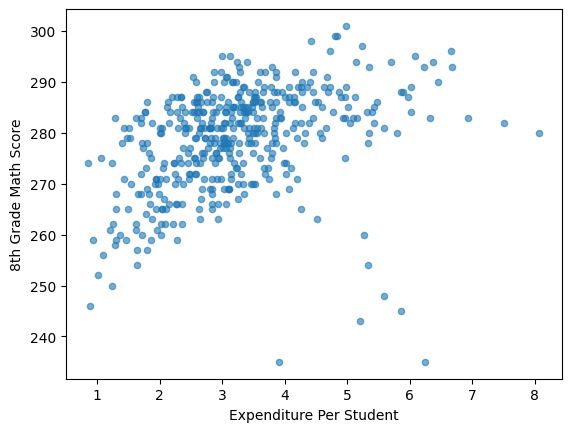

In [30]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Expenditure Per Student')
plt.ylabel('8th Grade Math Score')

**This scatter plot is comparing the amount spent per student, with the 8th grade math scores. This scatter plot has some correlation since there appears to be an increase in 8th grade math scores as the expenditure per student goes up. There are some significant outliers, such as the expenditure per student near 4, which has a score far below the average for that quantity. This plot shows there exists some positive correlation between scores and student expenditure, but further analysis must be done to determine how strong this is. Between 1-4 on the x axis the relationship seems strong but afterwards the pattern breaks and the values seem far more random. This may be due to certain school districts spending more, but that must be analyzed serperately.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df[['ENROLL_8','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [38]:
y.fillna(y.median(), inplace=True)
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [51]:
model.score(X_test, y_test)

0.8395369845535101

In [50]:
# I assumed this would be higher then the tutorials value since there were many outliers near the top end of expenditure
np.mean((model.predict(X_test)-y_test)**2)**0.5

4.401806436663676

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

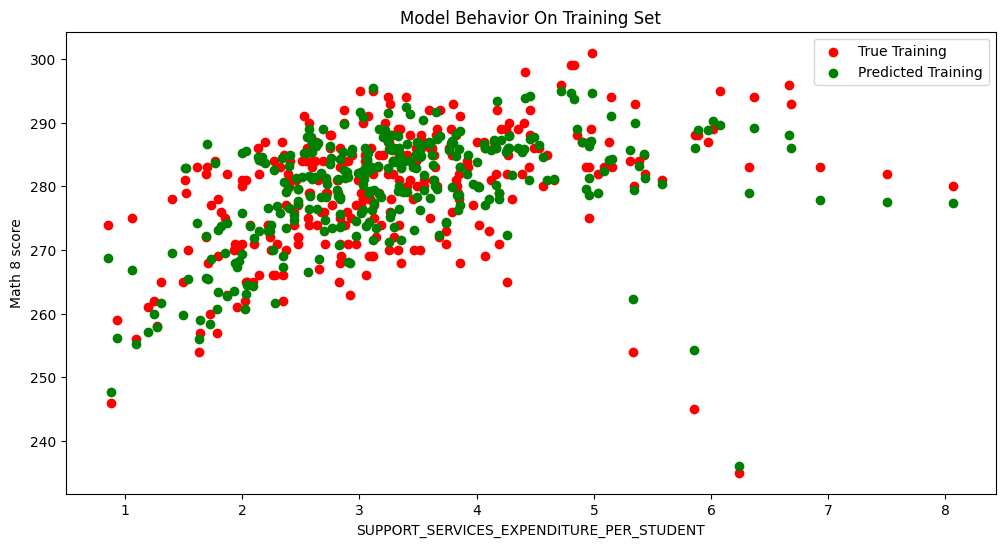

In [53]:
col_name = 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

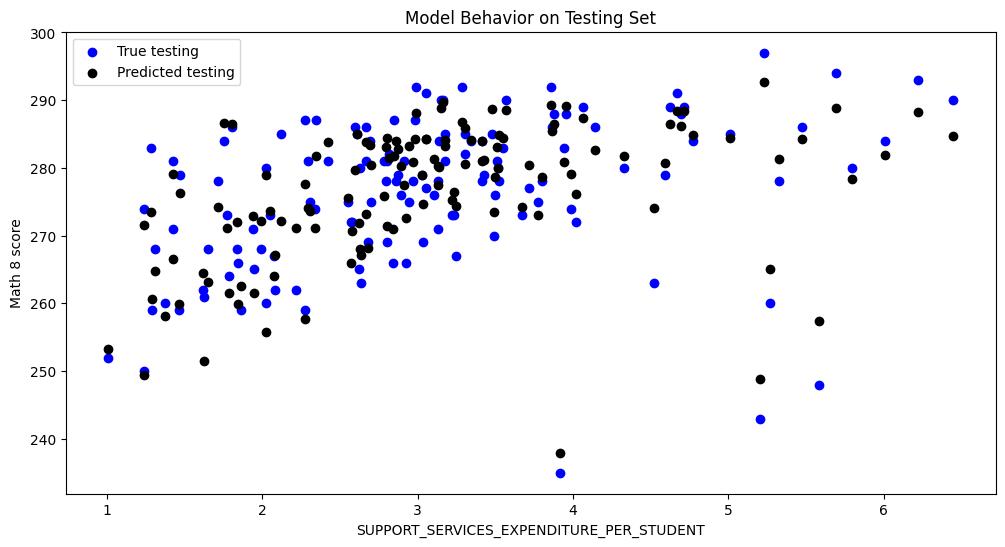

In [56]:
col_name = 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**It seems that our model performs equivalently on both the training and testing set. The feature chosen, seems to be the main reason for the models error in relation to the actual testing data. This feature, has inconsistency amongst the states which have higher expenditure, which is causing the MSE of the values past expenditure 4 to have greater MSE. Since MSE highlights larger gaps and minimizes smaller ones, these points weigh significantly on the models total performance. In the range of 1-4 for expenditure, the model does relatively well on both training and testing data. Within this range, a positive correlation is more evident, but the deviation between the highest and lowest scores in the same expenditure tier is still significant. The performance of the model considering the feature's inconsistency is good, but in the future, a more consistent feature will likely provide better feedback. The model does not seem to overfit the data in this case since it's error on the test versus training is fairly similar.**